In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn import datasets
from collections import Counter

In [2]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
x_train, x_test, y_train, y_test = TTS(X, y, train_size = 0.7, shuffle = True)

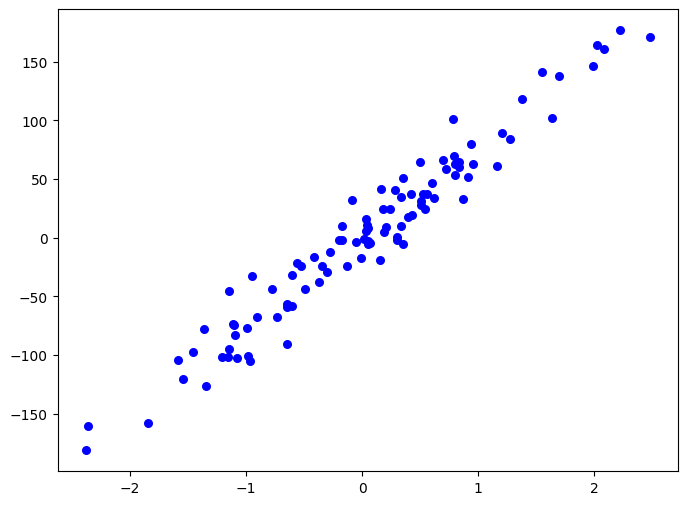

In [3]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [4]:
x_train.shape

(70, 1)

In [5]:
y_train.shape

(70,)

In [14]:
class LR:
    def __init__(self, lr = 0.01, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, x, y):
        #init parameters
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(x, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, x):
        y_predicted = np.dot(x, self.weights) + self.bias
        return y_predicted

In [15]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [16]:
from tqdm import tqdm
regressor = LR()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)

In [9]:
mse_val = mse(y_test, predicted)

In [10]:
mse_val

346.1709265652422